# 머신러닝 프레임워크 : scikit-learn
: 다양한 분류기를 지원하며, 검증하는 기능, 분류 회귀, 클러스터링, 차우너축소법이 가능하면 샘플데이터로 제공합니다.

In [1]:
# XOR 연산 학습해 보기
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [12]:
import pandas as pd

xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2] # Feature Columns
xor_label = xor_df.iloc[:,2] # Target Columns
xor_label

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [20]:
# 데이터 학습과 예측하기
from sklearn import svm, metrics

clf = svm.SVC() # SVC Classification SVR Regression
clf.fit(xor_data,xor_label)
pred = clf.predict(xor_data)
print(pred)

[0 1 1 0]


In [26]:
# 정답율 구하기
ac_score = metrics.accuracy_score(xor_label,pred)
print('정답률 : ',ac_score)

정답률 :  1.0


In [30]:
# 정답률 구하기 : predict를 구하지 않고 정답률 구하기

clf.score(xor_data,xor_label) # score 


1.0

In [33]:
### 붓꽃의 품종 분류하기
iris = pd.read_csv("../Data/iris.csv")
iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# 기본 통계량 확인하기
iris.describe(include= 'all')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [40]:
# NaN확인하기
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [41]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [46]:
iris.loc[iris.Name == 'Iris-setosa', 'Color']  = 'red'
iris.loc[iris.Name == 'Iris-versicolor', 'Color']  = 'green'
iris.loc[iris.Name == 'Iris-virginica', 'Color']  = 'blue'

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,6.2,3.4,5.4,2.3,Iris-virginica,blue


In [49]:
color_tmp = []

for name in iris['Name']:
    if name == 'Iris-setosa':
        color_tmp.append('red')
    elif name == 'Iris-versicolor':
        color_tmp.append('green')
    else:
        color_tmp.append('blue')

iris['Color'] = color_tmp
iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [50]:
iris.Color.unique()

array(['red', 'green', 'blue'], dtype=object)

In [55]:
# Scatter 그려보기
import matplotlib.pyplot as plt
import seaborn as sns

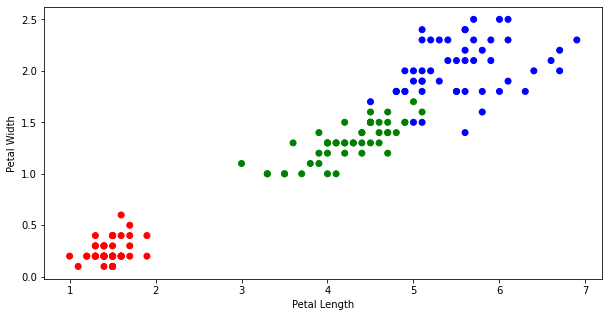

In [82]:

plt.figure(figsize=(10,5))

plt.scatter(
    data = iris,
    x = 'PetalLength',
    y = 'PetalWidth',
    c = 'Color'

)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [84]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_label = iris['Name']
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [95]:
# 학습용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label)
print(train_data.head())
print(test_data.head())
print("-" * 50)
print(train_label.head())
print(test_label.head())


    SepalLength  SepalWidth  PetalLength  PetalWidth
34          4.9         3.1          1.5         0.1
67          5.8         2.7          4.1         1.0
93          5.0         2.3          3.3         1.0
73          6.1         2.8          4.7         1.2
48          5.3         3.7          1.5         0.2
     SepalLength  SepalWidth  PetalLength  PetalWidth
15           5.7         4.4          1.5         0.4
68           6.2         2.2          4.5         1.5
24           4.8         3.4          1.9         0.2
119          6.0         2.2          5.0         1.5
45           4.8         3.0          1.4         0.3
--------------------------------------------------
34        Iris-setosa
67    Iris-versicolor
93    Iris-versicolor
73    Iris-versicolor
48        Iris-setosa
Name: Name, dtype: object
15         Iris-setosa
68     Iris-versicolor
24         Iris-setosa
119     Iris-virginica
45         Iris-setosa
Name: Name, dtype: object


In [102]:
# 학습 시키기
clf = svm.SVC()
clf.fit(train_data,train_label)

SVC()

In [103]:
# 예측 하기 
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


In [104]:

# 정답률
ac_score = metrics.accuracy_score(test_label,pred)
print('정답률 :',ac_score)

정답률 : 0.9736842105263158


In [108]:
# Training 정답률
clf.score(train_data,train_label)

0.9732142857142857

In [109]:
# Test 정답률 
clf.score(test_data, test_label)

0.9736842105263158

In [115]:
# 분류 Report()
cl_report = metrics.classification_report(test_label,pred)

print(cl_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.98        38
   weighted avg       0.98      0.97      0.97        38



In [116]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [124]:
clf.predict([[4.1,3.5,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

In [127]:
iris[iris.Name=='Iris-setosa'].describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [ ]:
#flask는 python 서버임 

---
### 분류 Report 이해하기


번호 : [1,2,3,4,5,6]  
정답 : [음치, 음치, 음치, 음치, 정상, 정상]  
예측 : [음치, 음치, 정상, 정상, 정상, 정상]  

정확도 : 예측이 많은 비율 ?  
        1,2,5,6 번은 맞추고 3,4 번은 틀렸다. 6명 중에서 4명을 맞췄으므로 4/6 = 2/3 = 0.66

정밀도 : 음치라고 예측한 사람 중에 진짜 음치가 얼마나 있는 가?
        내가 음치라고 예측한 1,2 번이 둘 다 음치가 맞았다. 2/2 = 1.0

재현율 : 전체 음치 중에 내가 맞춘 음치의 비율은?
        원래 음치가 4명이 잇었느 넫 나는 그 중에서 2명을 맞췄다. 2/4 = 0.5

F1 - score : 정밀도와 재현율의 평균
                2 * 정밀도 * 재현율 / (정밀도 + 재현율) = 2* 1.0 * 0.5 / (1.0 + 0.5) = 0.66


In [ ]:
# 수치해석 책보면 알고리즘 코드로 잘 짤 수 잇다.

# Python Code로 확인하기

In [1]:
import numpy as np

In [7]:
y = np.array([1,1,1,1,0,0]) # 정답 1 음치 0 정상
p = np.array([1,1,0,0,0,0]) # 예측

# 정확도
accuracy = np.mean(np.equal(y,p))
print(accuracy)

# 정밀도
right = np.sum(y * p == 1)
precision = right / np.sum(p)
print(precision)

# 재현율
recall = right / np.sum(y)
print(recall)

# f1 score
f1 = 2 * precision * recall / (precision + recall)
print(f1)


0.6666666666666666
1.0
0.5
0.6666666666666666


In [9]:
from sklearn import metrics

In [12]:
print('accuracy :', metrics.accuracy_score(y,p))
print('precisioni :', metrics.precision_score(y,p))
print('recall :', metrics.recall_score(y,p))
print('f1-score :', metrics.f1_score(y,p))

accuracy : 0.6666666666666666
precisioni : 1.0
recall : 0.5
f1-score : 0.6666666666666666
